In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the dfs
ts = pd.read_csv('files/timeseries.csv.gz')
ts.loc[:, 'ts'] = pd.to_datetime(ts['ts'])
minv = pd.read_csv('files/media_investments.csv.gz')
minv.loc[:, 'ts'] = pd.to_datetime(minv['ts'])
mdim = pd.read_csv('files/media_dimensions.csv.gz')

In [3]:
ts.head(10)

,ts,traffic,registrations,first_purchases
0,2020-07-01 00:00:00,58.0,0.0,0.0
1,2020-07-01 00:01:00,61.0,0.0,0.0
2,2020-07-01 00:02:00,64.0,2.0,1.0
3,2020-07-01 00:03:00,60.0,1.0,0.0
4,2020-07-01 00:04:00,61.0,2.0,0.0
5,2020-07-01 00:05:00,55.0,1.0,0.0
6,2020-07-01 00:06:00,50.0,1.0,0.0
7,2020-07-01 00:07:00,56.0,1.0,0.0
8,2020-07-01 00:08:00,65.0,0.0,0.0
9,2020-07-01 00:09:00,57.0,0.0,0.0


In [4]:
minv.head(10)

,ts,media_investment,media_index
0,2020-07-01 01:14:00,424.732863,1133
1,2020-07-01 04:39:00,324.863646,5020
2,2020-07-01 05:07:00,165.070659,3397
3,2020-07-01 06:51:00,264.791902,2744
4,2020-07-01 07:21:00,327.557838,4787
5,2020-07-01 11:47:00,706.992475,5525
6,2020-07-01 11:57:00,315.117000,479
7,2020-07-01 13:12:00,792.241255,3246
8,2020-07-01 13:15:00,530.935781,3042
9,2020-07-01 15:18:00,793.499552,3248


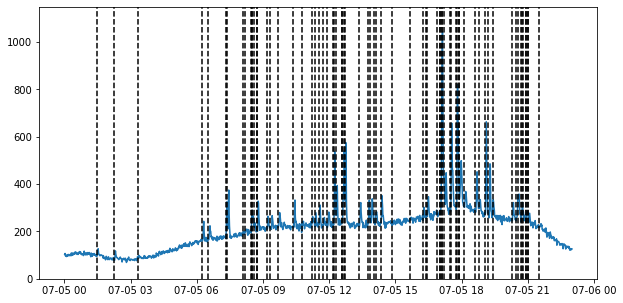

In [7]:
start_time = '2020-07-05 00:00:01'
end_time = '2020-07-05 23:00:00'
plot_ads = True
to_plot = ts.loc[(ts['ts'] >= pd.Timestamp(start_time)) & (ts['ts'] <= pd.Timestamp(end_time))]
minv_plot = minv.loc[(minv['ts'] >= pd.Timestamp(start_time)) & (minv['ts'] <= pd.Timestamp(end_time))]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(to_plot['ts'], to_plot['traffic'], label='Traffic')
ax.set_ylim([0, to_plot['traffic'].max()*1.1])
if plot_ads:
    for mi in minv_plot['ts'].values:
        ax.axvline(mi, linestyle='--', color='k', label='Ad')